Nama: Daffa Maulana Fadhilah

NIM : 1301204216

In [10]:
!gdown --id 1V_Ppvc32TWRiYs7rxFLlJ3X6Yrh-KidE

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1V_Ppvc32TWRiYs7rxFLlJ3X6Yrh-KidE
To: /content/food.zip
100% 101M/101M [00:00<00:00, 156MB/s] 


In [11]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [12]:
local_zip = '/content/food.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [13]:
train_data = '/tmp/data/food-101-tiny/train'
val_data = '/tmp/data/food-101-tiny/valid'

In [14]:
TRAINING_DIR = '/tmp/data/food-101-tiny/train'
train_datagen = ImageDataGenerator(rotation_range=15,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    rescale=1./255,
                                    validation_split=0.2)
train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                    batch_size=64,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

VALIDATION_DIR = '/tmp/data/food-101-tiny/valid'
validation_datagen = ImageDataGenerator(rescale=1./255.)
validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=64,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))

Found 1500 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


In [15]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, 3, activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, 3,  activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,
                              epochs=150,
                              verbose=1,
                              validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/150
24/24 [==============================] - 14s 528ms/step - loss: 2.3240 - accuracy: 0.1000 - val_loss: 2.3020 - val_accuracy: 0.1080
Epoch 2/150
24/24 [==============================] - 12s 520ms/step - loss: 2.3007 - accuracy: 0.1080 - val_loss: 2.2880 - val_accuracy: 0.1060
Epoch 3/150
24/24 [==============================] - 13s 529ms/step - loss: 2.3109 - accuracy: 0.1147 - val_loss: 2.2693 - val_accuracy: 0.1700
Epoch 4/150
24/24 [==============================] - 13s 522ms/step - loss: 2.2241 - accuracy: 0.1793 - val_loss: 2.1205 - val_accuracy: 0.2260
Epoch 5/150
24/24 [==============================] - 13s 526ms/step - loss: 2.1619 - accuracy: 0.1867 - val_loss: 2.0204 - val_accuracy: 0.2520
Epoch 6/150
24/24 [==============================] - 12s 517ms/step - loss: 2.1266 - accuracy: 0.2147 - val_loss: 2.0060 - val_accuracy: 0.2720
Epoch 7/150
24/24 [==============================] - 13s 526ms/step - loss: 2.0901 - accuracy: 0.2307 - val_loss: 2.1500 - val_accuracy:

Text(0.5, 1.0, 'Training and validation loss')

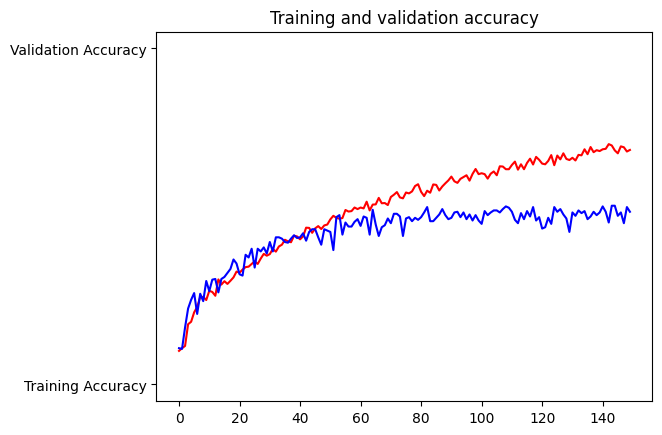

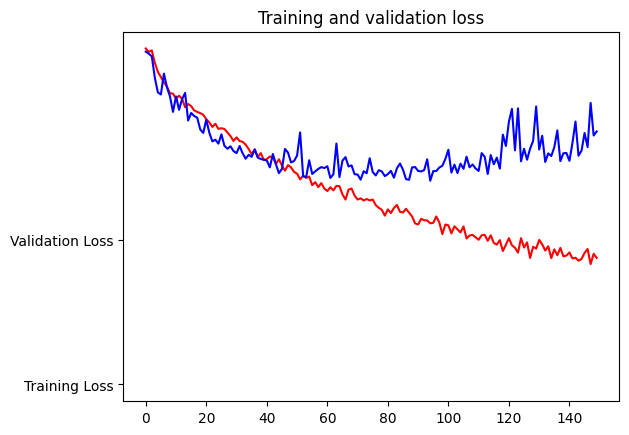

In [18]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)